# **Ejercicio 1**

 Realiza un detector de esquinas con el algoritmo de Harris para la imagen 

*    Realiza un detector de esquinas con el algoritmo de Harris para la imagen blocks.png


*   Utiliza funciones de opencv y busca los parámetros que permitan mejorar el resultado


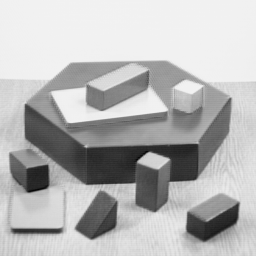

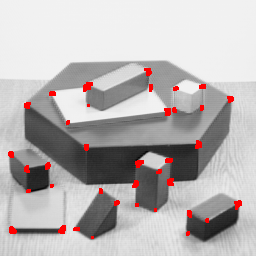

In [20]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('blocks.png', 1).astype(np.float32)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
a, b, c = 4, 5, 0.09

C = cv2.cornerHarris(gray, a, b, c)
C = cv2.dilate(C, None)

img[C>0.01*C.max()] = [0, 0, 255]
cv2_imshow(img)

# **Ejercicio 2**

* Realiza tu propio detector de esquinas desarrollando el algoritmo de Harris por etapas a partir 
del algoritmo de la página 13
* Utiliza la imagen geometry.png para comparar tu función propia con las funciones de opencv. 
Busca los parámetros que permitan obtener mejores resultados.

Imagen original


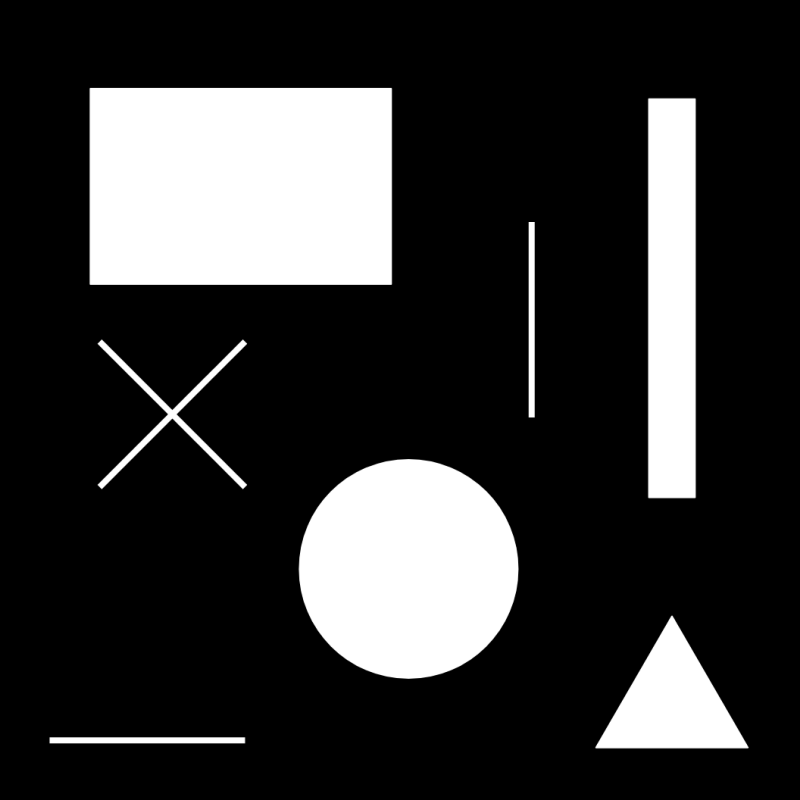

Imagen con esquinas


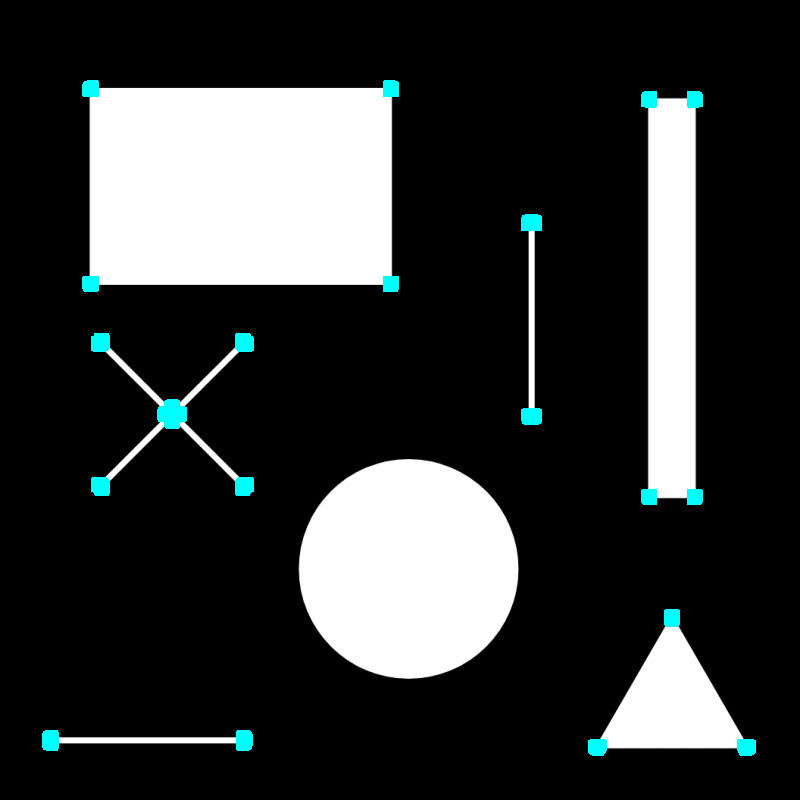

In [13]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img = cv2.imread('geometry.png', 1).astype(np.float32)
print("Imagen original")
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernelD = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Ix = cv2.filter2D(gray, -1, kernelD)
Iy = cv2.filter2D(gray, -1, np.transpose(kernelD))

Ix2, Iy2, Ixy = Ix**2, Iy**2, Ix*Iy

k = 7
kernelG = np.ones((k, k))/k**2
GIx2 = cv2.filter2D(Ix2, -1, kernelG)
GIy2 = cv2.filter2D(Iy2, -1, kernelG)
GIxy = cv2.filter2D(Ixy, -1, kernelG)

a = 0.005
C = GIx2 * GIy2 - GIxy**2 - a*(GIx2 + GIy2)**2
C /= np.max(C)
C = cv2.dilate(C, None, iterations=5)
img[C>0.05]=[255, 255, 0]

print("Imagen con esquinas")
cv2_imshow(img)

# **Ejercicio 3**

* Realiza un programa en python 
que permita la detección de 
características de la imagen 
pulpo1.png mediante el 
algoritmo SIFT

* Cambia los parámetros del 
algoritmo para obtener mejores 
resultados en la detección.

Imagen original


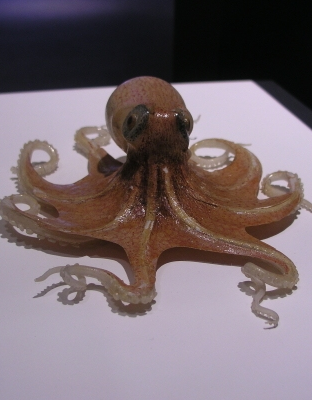

SIFT


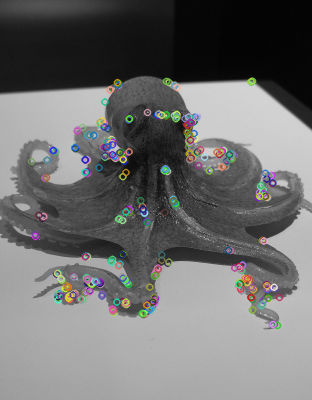

In [15]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('pulpo1.png')
print("Imagen original")
cv2_imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create()
kp = orb.detect(gray, None)
img = cv2.drawKeypoints(gray, kp, img)

print("SIFT")
cv2_imshow(img)

# **Ejercicio 4**

* Realiza un programa en python que permita la detección de características del par de imágenes 
pulpo1.png y pulpo2.png mediante el algoritmo SIFT

* Incluye en tu programa un método de feature matching de fuerza bruta para calcular las 
correspondencias de las características de ambas imágenes


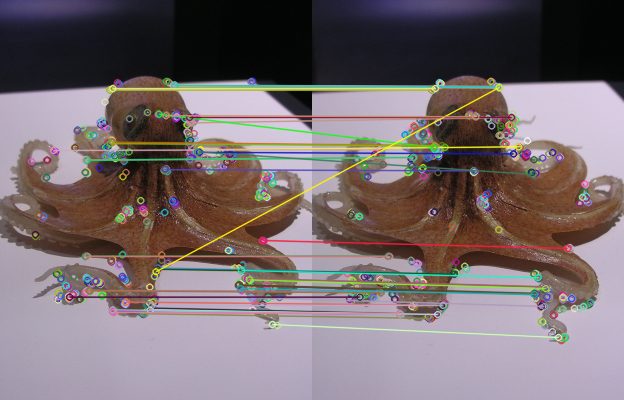

In [18]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img1 = cv2.imread('pulpo1.png')
img2 = cv2.imread('pulpo2.png')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) 
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create()

kp1, dp1 = orb.detectAndCompute(gray1, None)  
kp2, dp2 = orb.detectAndCompute(gray2, None)

matcher = cv2.BFMatcher()
matches = matcher.match(dp1, dp2)
matches = sorted(matches, key = lambda x:x.distance)

Fimg = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None)

cv2_imshow(Fimg)